In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string   
import re
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split

# load data

In [2]:
df=pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# columns' title to lower case

In [3]:
df.columns= df.columns.str.lower()
df.columns

Index(['id', 'productid', 'userid', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

# clean text

In [4]:
def deEmojify(inputString):#to remove emojis in the text.
   try:
    return inputString.encode('ascii', 'ignore').decode('ascii') 
   except:
       return inputString

STOPWORDS=stopwords.words("english")    #most common unnecessary words. eg is, he, that, etc

def filter_text(text):
    text=text.strip('\n')
    text=deEmojify(str(text))
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
 
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
   
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned = ' '.join([str(token) for token in tokens]) 
    
    return text_cleaned

In [5]:
print(filter_text('This cake is awesome!. But the package quality is not good. '))

cake awesome package quality good 


In [6]:
df['text']=df['text'].apply(lambda x:filter_text(x))

In [7]:
df

,id,productid,userid,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,great sesame chickenthis good better resturant...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,im disappointed flavor chocolate notes especia...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,stars small give 1015 one training session tri...
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,best treats training rewarding dog good groomi...


In [8]:
print(len(df))
print('Unique Products')
print(len(df.groupby('productid')))
print('Unique Users')
print(len(df.groupby('userid')))

568454
Unique Products
74258
Unique Users
256059


# Calculate numbers of words in text


In [9]:
df['num_words_text'] = df['text'].apply(lambda x:len(str(x).split())) 

In [10]:
print('-------Dataset --------')
print(df['score'].value_counts())
print(len(df))
print('-------------------------')
max_review_data_sentence_length  = df['num_words_text'].max()

print('Train Max Sentence Length :'+str(max_review_data_sentence_length))

-------Dataset --------
5    363122
4     80655
1     52268
3     42640
2     29769
Name: score, dtype: int64
568454
-------------------------
Train Max Sentence Length :1977


In [11]:
df['num_words_text'].describe()

count    568454.000000
mean         41.488309
std          42.654358
min           1.000000
25%          17.000000
50%          29.000000
75%          50.000000
max        1977.000000
Name: num_words_text, dtype: float64

<AxesSubplot:xlabel='num_words_text'>

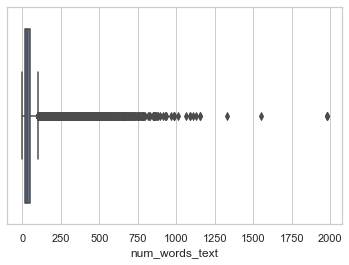

In [12]:
sns.set(style="whitegrid")
sns.boxplot(x=df['num_words_text'])

# assumption : Score 1,2-negative,  4,5-positive/ drop Score 3 data

In [13]:
df=df[df['score'] != 3]

In [14]:
print('-------Dataset --------')
print(df['score'].value_counts())
print(len(df))

-------Dataset --------
5    363122
4     80655
1     52268
2     29769
Name: score, dtype: int64
525814


In [15]:
def get_sentiment(rating):
    if rating == 5 or rating == 4 :
        return 1 #positive
    else:
        return 0 #negative

# create a dataset having reviews of 100 words or less

In [16]:
mask = (df['num_words_text'] < 100) & (df['num_words_text'] >=20)
df_short_reviews = df[mask]
print('No of Short reviews')
print(len(df_short_reviews))

mask = df['num_words_text'] >= 100
df_long_reviews = df[mask]
print('No of Long reviews')
print(len(df_long_reviews))

No of Short reviews
322793
No of Long reviews
34980


In [17]:
print(df_short_reviews['num_words_text'].max())

99


We will use product reviews which has more than +20 reviews per product to have reliable reviews.

In [107]:
filtered_data = df_short_reviews.groupby('productid').filter(lambda x: len(x) >= 20)
print(len(filtered_data))
print(filtered_data ['score'].value_counts())
filtered_data ['sentiment'] = filtered_data ['score'].apply(get_sentiment)
data = filtered_data[['text','sentiment']]
print('Data')
print(data['sentiment'].value_counts())

160106
5    105054
4     28599
1     16115
2     10338
Name: score, dtype: int64
Data
1    133653
0     26453
Name: sentiment, dtype: int64


In [108]:
data['sentiment']

423       1
424       1
425       1
426       1
427       1
         ..
568061    0
568062    1
568063    1
568066    0
568070    1
Name: sentiment, Length: 160106, dtype: int64

In [109]:
df.columns

Index(['id', 'productid', 'userid', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text',
       'num_words_text', 'sentiment'],
      dtype='object')

In [110]:
print(data['sentiment'].value_counts())

1    133653
0     26453
Name: sentiment, dtype: int64


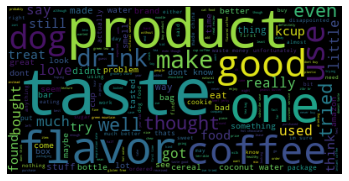

In [111]:
#build wordcloud graph
#in both conditions of sentiment == 0 and sentiment == 1
import wordcloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
s1=[]

#adjust sentiment to 0 or 1 to see the word frequencies 
#under postive and negative reviews
data=data.loc[data['sentiment'] == 0, 'text']
for i in data:
    s1.append(i)
s1=[''.join(jieba.cut(sentence)) for sentence in s1]
word_list='     '.join((s1))
type(s1)
type(word_list)
wordcloud=wordcloud.WordCloud(background_color='black').generate(word_list)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [105]:
#rating histogram 
def rating_histo_graph(df, log=False):
    df["score"].hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5], log=log, figsize=(12,6), grid=True, color="#703eb0")
    plt.title("People-Rating Graph")
    plt.xlabel("Rating")
    plt.ylabel("Number of Ratings")
    plt.show()

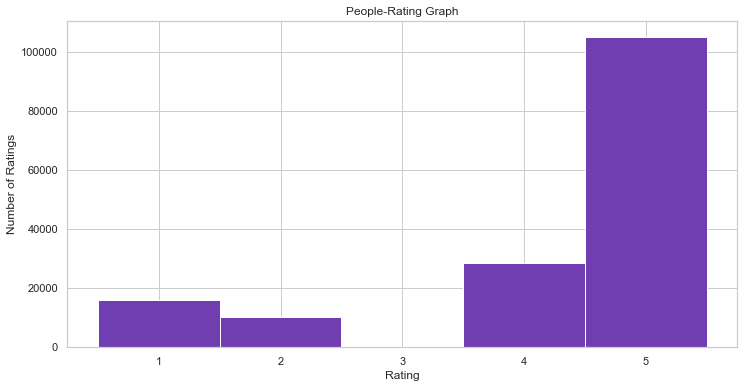

In [106]:
rating_histo_graph(filtered_data)

In [112]:
def rating_boxplot(df):
#sns.boxplot(data=df['rating'], orient="h", palette="Set2", showmeans=True, meanline=True)
#color = dict(boxes='black', whiskers='blue', medians='red', caps='black')
# styles=dict(whiskers='--')
#df['rating'].plot.box(color=color, style=styles)
    sns.boxplot(x="score", data=df, whis=5, color='None', showmeans=True, meanline=True);

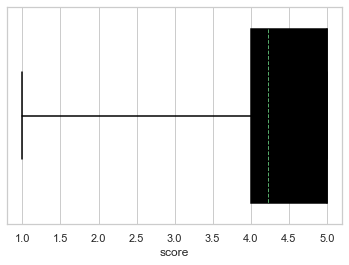

In [113]:
rating_boxplot(filtered_data)

save this as a .csv file to use it as training and test data

In [30]:
data.to_csv('./data/data.csv')

In [2]:
df = pd.read_csv("./data/data.csv")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2,random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=1) # 0.25 x 0.8 = 0.2

In [6]:
X_train

107044    worse tea fresh green tea indeed green tea tim...
117433    ive tasted best real things wonderful dreadful...
71509     love taste good ginger snap cookie saw offered...
4188      absolutely love coachs oatmeal hated oatmeal t...
55966     normally dont go instant coffees delicious ins...
                                ...                        
76685     ive loved graham crackers since kid many brand...
51917     decided give try since kcup coffee prices goin...
31444     excellent coffee either brewed hot ice drink l...
102206    reading useful negative review times comment t...
131087    excited high protein pretzels opened tasted ta...
Name: text, Length: 96063, dtype: object

Export train / test / validation set to have the same set for each model (to compare each model's performance better)

In [10]:
X_train.to_csv('./data/X_train.csv',index=False)
X_test.to_csv('./data/X_test.csv',index=False)
y_train.to_csv('./data/y_train.csv',index=False)
y_test.to_csv('./data/y_test.csv',index=False)
X_val.to_csv('./data/X_val.csv',index=False)
y_val.to_csv('./data/y_val.csv',index=False)